In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bootstrap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import StratifiedKFold, cross_val_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, label_binarize, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, auc, roc_auc_score
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Test Dateset Preparation

test_data_folder = "./data/AReM/"
test_df_list = []


for dir_name in os.listdir(test_data_folder):
    activity_path = os.path.join(test_data_folder, dir_name)

    if os.path.isdir(activity_path):
        if dir_name in ["bending1", "bending2"]:
            selected_files = ["dataset1.csv", "dataset2.csv"]
        else:
            selected_files = ["dataset1.csv", "dataset2.csv", "dataset3.csv"]
            
        for file_name in selected_files:
            file_path = os.path.join(activity_path, file_name)

            if os.path.exists(file_path):
                df = pd.read_csv(file_path, delimiter=",", skiprows=4)
                df["Activity"] = dir_name
                test_df_list.append(df)


if test_df_list:
    test_df = pd.concat(test_df_list, ignore_index=False, axis=0)
    test_df.reset_index(drop=True, inplace=True)
    test_df = test_df.rename(columns = {'# Columns: time':'Time'})

test_df.head()

,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Activity
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [3]:
#testing dataset

train_data_folder = "./data/AReM/"
train_df_list = []

for dir_name in os.listdir(train_data_folder):
    activity_path = os.path.join(train_data_folder, dir_name)

    if os.path.isdir(activity_path):
        
        if dir_name in ["bending1", "bending2"]:
            test_files = {"dataset1.csv", "dataset2.csv"}
        else:
            test_files = {"dataset1.csv", "dataset2.csv", "dataset3.csv"}

        train_files = [f for f in os.listdir(activity_path) if f.endswith('.csv') and f not in test_files]

        for file_name in train_files:
            file_path = os.path.join(activity_path, file_name)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, delimiter=",", skiprows=4)
                df["Activity"] = dir_name
                train_df_list.append(df)


if train_df_list:
    train_df = pd.concat(train_df_list, ignore_index=False, axis=0)
    train_df.reset_index(drop=True, inplace=True)
    train_df = train_df.rename(columns = {'# Columns: time':'Time'})


train_df.head()

,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Activity
0,0,42.00,0.00,18.50,0.50,12.00,0.00,bending1
1,250,42.00,0.00,18.00,0.00,11.33,0.94,bending1
2,500,42.75,0.43,16.75,1.79,18.25,0.43,bending1
3,750,42.50,0.50,16.75,0.83,19.00,1.22,bending1
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,bending1


In [4]:
#training data set

train_data_folder = "./data/AReM/"
train_df_list = []

for dir_name in os.listdir(train_data_folder):
    activity_path = os.path.join(train_data_folder, dir_name)

    if os.path.isdir(activity_path):
        
        if dir_name in ["bending1", "bending2"]:
            test_files = {"dataset1.csv", "dataset2.csv"}
        else:
            test_files = {"dataset1.csv", "dataset2.csv", "dataset3.csv"}

        train_files = [f for f in os.listdir(activity_path) if f.endswith('.csv') and f not in test_files]

        for file_name in train_files:
            file_path = os.path.join(activity_path, file_name)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, delimiter=",", skiprows=4)
                df["Activity"] = dir_name
                train_df_list.append(df)


if train_df_list:
    train_df = pd.concat(train_df_list, ignore_index=False, axis=0)
    train_df.reset_index(drop=True, inplace=True)
    train_df = train_df.rename(columns = {'# Columns: time':'Time'})

train_df.head()

,Time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,Activity
0,0,42.00,0.00,18.50,0.50,12.00,0.00,bending1
1,250,42.00,0.00,18.00,0.00,11.33,0.94,bending1
2,500,42.75,0.43,16.75,1.79,18.25,0.43,bending1
3,750,42.50,0.50,16.75,0.83,19.00,1.22,bending1
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,bending1


In [5]:
data_folder = "./data/AReM/"
df_list = []

for dir_name in os.listdir(data_folder):
    activity_path = os.path.join(data_folder, dir_name)

    if os.path.isdir(activity_path):
        for csv_file in os.listdir(activity_path):
            if csv_file.endswith('.csv'):
                data_path_csv = os.path.join(activity_path, csv_file)
                df = pd.read_csv(data_path_csv, delimiter=",", skiprows=4)
                df_list.append(df)

feature_list = []
for i, df in enumerate(df_list):  
    features = {"Instance": i + 1}
    
    for col_i, col in enumerate(df.columns[1:], start=1):
        features[f"min_{col_i}"] = np.min(df[col])
        features[f"max_{col_i}"] = np.max(df[col])
        features[f"mean_{col_i}"] = np.mean(df[col])
        features[f"median_{col_i}"] = np.median(df[col])
        features[f"STD_{col_i}"] = np.std(df[col])
        features[f"q1_{col_i}"] = np.percentile(df[col], 25)
        features[f"q3_{col_i}"] = np.percentile(df[col], 75)
    
    feature_list.append(features)

feature_df = pd.DataFrame(feature_list)
feature_df = feature_df.drop(columns=['Instance'])

std_feature_df = feature_df.describe()
std_feature_df = std_feature_df.loc[['std']].T
std_feature_df

,std
min_1,9.569975
max_1,4.394362
mean_1,5.335718
median_1,5.440054
STD_1,1.770306
q1_1,6.153590
q3_1,5.138925
min_2,0.000000
max_2,5.062729
mean_2,1.574164


In [6]:
n_trials = 1000
ci_dict = {}
for col in feature_df.columns:
    col_values = feature_df[col].dropna().values
    bootstrap_std = bootstrap((feature_df[col].values,), np.std, confidence_level=0.9, n_resamples=n_trials, method='percentile')
    ci_dict[col] = (bootstrap_std.confidence_interval.low, bootstrap_std.confidence_interval.high)

ci_df = pd.DataFrame(ci_dict, index=['Lower Bound', 'Upper Bound']).T
std_feature_df.join(ci_df)

,std,Lower Bound,Upper Bound
min_1,9.569975,8.183994,10.745249
max_1,4.394362,3.295427,5.281900
mean_1,5.335718,4.679745,5.824681
median_1,5.440054,4.799688,5.960004
STD_1,1.770306,1.559153,1.939416
q1_1,6.153590,5.545403,6.610513
q3_1,5.138925,4.295397,5.807521
min_2,0.000000,0.000000,0.000000
max_2,5.062729,4.605896,5.373703
mean_2,1.574164,1.388331,1.693987


### Binary Classification Using Logistic Regression

In [7]:
train_df['Activity'].unique()

array(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying',
       'cycling'], dtype=object)

In [8]:
# Processing the trainig data list of datframes which were stored earlier in the above variable
columns_reqd = ["avg_rss12", "var_rss12", "var_rss23"]

train_126_list = []

for df in train_df_list:
    features = {}    
    for col in columns_reqd:
        features[f"{col}_mean"] = np.mean(df[col])
        features[f"{col}_median"] = np.median(df[col])
        features[f"{col}_std"] = np.std(df[col])

    features["Activity"] = df["Activity"].iloc[0]
    train_126_list.append(features)

train_126_df = pd.DataFrame(train_126_list)
train_126_df['Activity'] = train_126_df['Activity'].replace(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying','cycling'], ['1','0','1','0','0','0','0'])

print(train_126_df.shape)
train_126_df.head()

(69, 10)


,avg_rss12_mean,avg_rss12_median,avg_rss12_std,var_rss12_mean,var_rss12_median,var_rss12_std,var_rss23_mean,var_rss23_median,var_rss23_std,Activity
0,43.969125,44.50,1.616677,0.413125,0.47,0.262837,0.555312,0.49,0.487318,1
1,43.454958,43.25,1.384653,0.378083,0.47,0.315237,0.679646,0.50,0.621885,1
2,42.179812,43.50,3.666840,0.696042,0.50,0.630203,0.613521,0.50,0.523771,1
3,41.678063,41.75,2.241152,0.535979,0.50,0.405046,0.383292,0.43,0.388759,1
4,43.954500,44.33,1.557210,0.426250,0.47,0.338337,0.493292,0.43,0.512971,1


### Plots

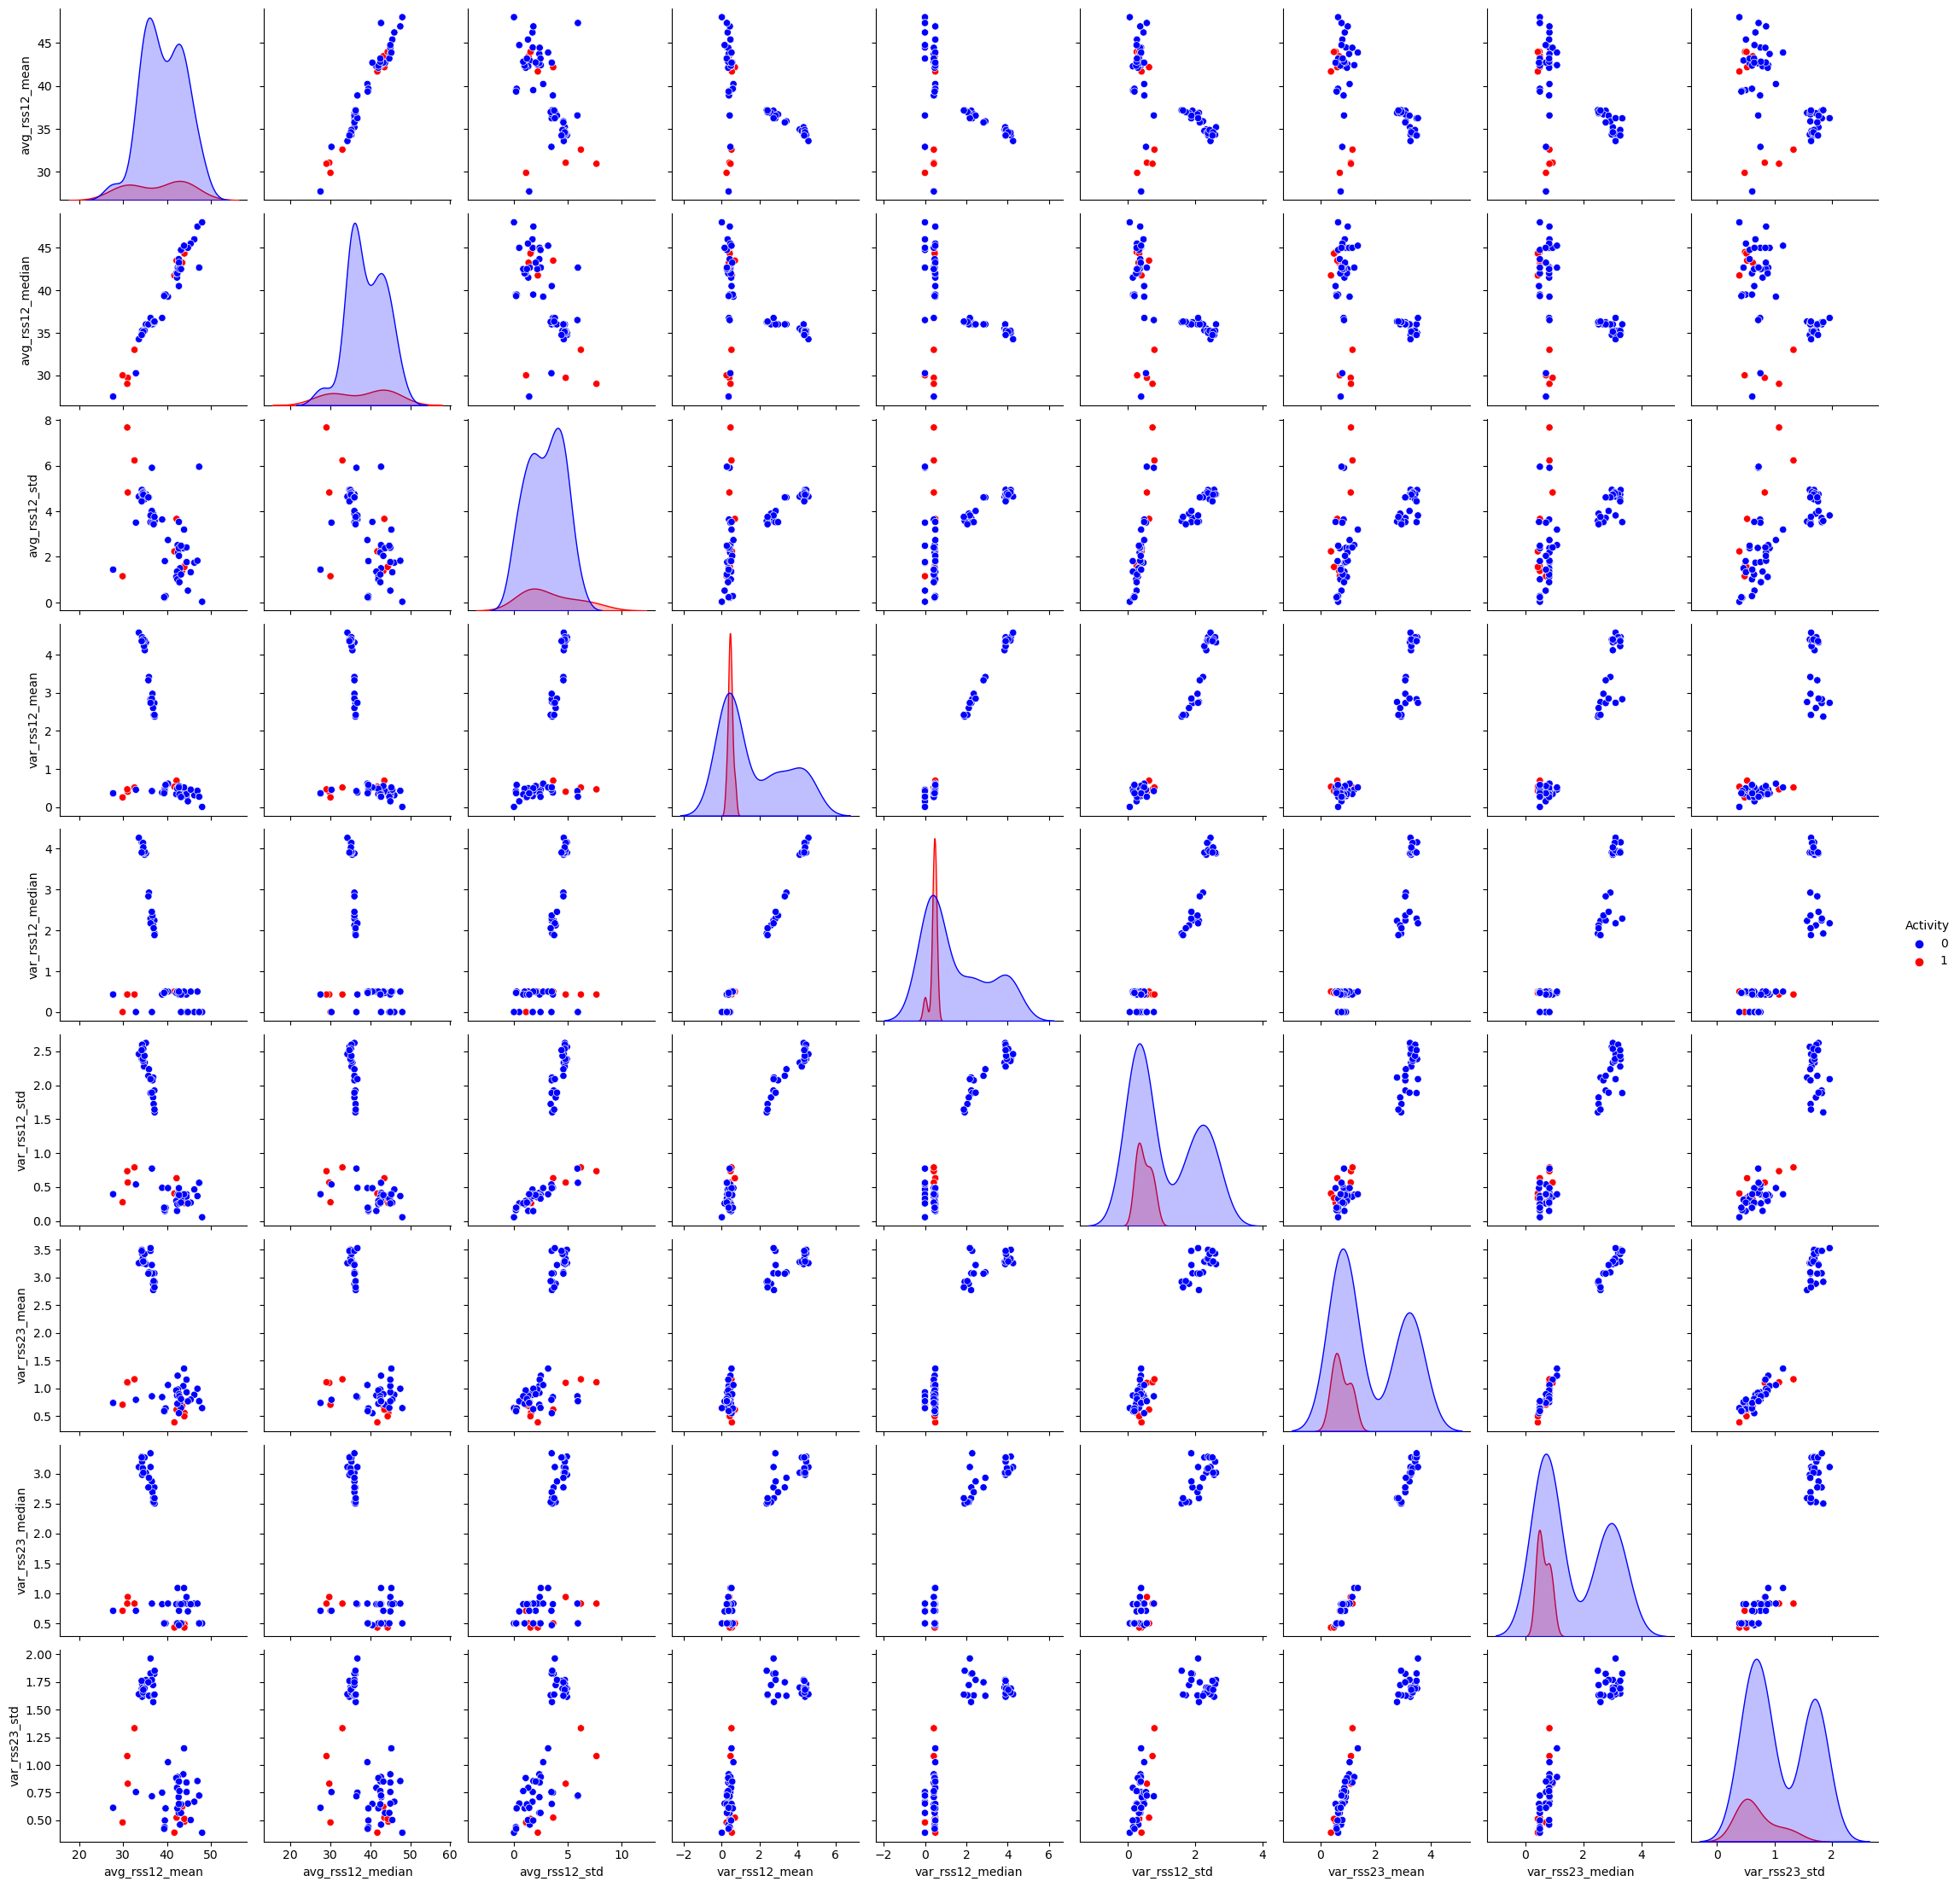

In [9]:
train_126_df["Activity"] = train_126_df["Activity"].astype("category")
sns.pairplot(train_126_df, hue="Activity", diag_kind="kde", palette={'0': "blue", '1': "red"})
plt.show()

In [10]:
def split_data_get_features(train_df_list, l, reqd_col):
    feature_list = []

    for df in train_df_list:
        features = {}
        segment_length = len(df) // l

        for i in range(l):
            start_idx = i * segment_length
            end_idx = (i + 1) * segment_length if i != l - 1 else len(df)
            segment = df.iloc[start_idx:end_idx]

            for col in reqd_col:
                features[f"{col}_MEAN_{i+1}"] = np.mean(segment[col])#segment[col].mean()
                features[f"{col}_MEDIAN_{i+1}"] = np.median(segment[col])#segment[col].median()
                features[f"{col}_STD_{i+1}"] = np.std(segment[col])#segment[col].std()
                features[f"{col}_MIN_{i+1}"] = np.min(segment[col])#segment[col].min()
                features[f"{col}_MAX_{i+1}"] = np.max(segment[col])#segment[col].max()
                features[f"{col}_Q1_{i+1}"] = np.percentile(segment[col], 25)#segment[col].percentile()
                features[f"{col}_Q3_{i+1}"] = np.percentile(segment[col], 75)#segment[col].percentile()

        features["Activity"] = df["Activity"].iloc[0]
        feature_list.append(features)

    return pd.DataFrame(feature_list)

### Splitted Plots

In [11]:
#Performing the splitting for 1,2 and 6th time series feature into 2 splits

columns_reqd = ["avg_rss12", "var_rss12", "var_rss23"]
train_126_splitcol_df = split_data_get_features(train_df_list, 2, columns_reqd)
train_126_splitcol_df['Activity'] = train_126_splitcol_df['Activity'].replace(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying','cycling'], ['1','0','1','0','0','0','0'])
train_126_splitcol_df = train_126_splitcol_df.drop(train_126_splitcol_df.filter(regex="MIN").columns, axis=1)
train_126_splitcol_df = train_126_splitcol_df.drop(train_126_splitcol_df.filter(regex="MAX").columns, axis=1)
train_126_splitcol_df = train_126_splitcol_df.drop(train_126_splitcol_df.filter(regex="Q1").columns, axis=1)
train_126_splitcol_df = train_126_splitcol_df.drop(train_126_splitcol_df.filter(regex="Q3").columns, axis=1)
print(train_126_splitcol_df.shape)
train_126_splitcol_df.head()

(69, 19)


,avg_rss12_MEAN_1,avg_rss12_MEDIAN_1,avg_rss12_STD_1,var_rss12_MEAN_1,var_rss12_MEDIAN_1,var_rss12_STD_1,var_rss23_MEAN_1,var_rss23_MEDIAN_1,var_rss23_STD_1,avg_rss12_MEAN_2,avg_rss12_MEDIAN_2,avg_rss12_STD_2,var_rss12_MEAN_2,var_rss12_MEDIAN_2,var_rss12_STD_2,var_rss23_MEAN_2,var_rss23_MEDIAN_2,var_rss23_STD_2,Activity
0,43.486208,43.71,1.279302,0.378667,0.470,0.283841,0.524875,0.470,0.485832,44.452042,44.50,1.767557,0.447583,0.5,0.235002,0.585750,0.50,0.486900,1
1,44.117042,45.00,1.357000,0.250042,0.000,0.313444,0.815417,0.710,0.716518,42.792875,42.67,1.056584,0.506125,0.5,0.260217,0.543875,0.50,0.472458,1
2,43.278875,45.00,3.466111,0.673292,0.485,0.632962,0.640958,0.765,0.553385,41.080750,42.00,3.530103,0.718792,0.5,0.626606,0.586083,0.47,0.490847,1
3,41.621208,42.33,3.112140,0.623083,0.500,0.488574,0.419083,0.430,0.410342,41.734917,41.50,0.594677,0.448875,0.5,0.272481,0.347500,0.43,0.362386,1
4,44.057167,44.50,1.553724,0.381042,0.470,0.328853,0.598250,0.500,0.525558,43.851833,43.50,1.553920,0.471458,0.5,0.341632,0.388333,0.00,0.477530,1


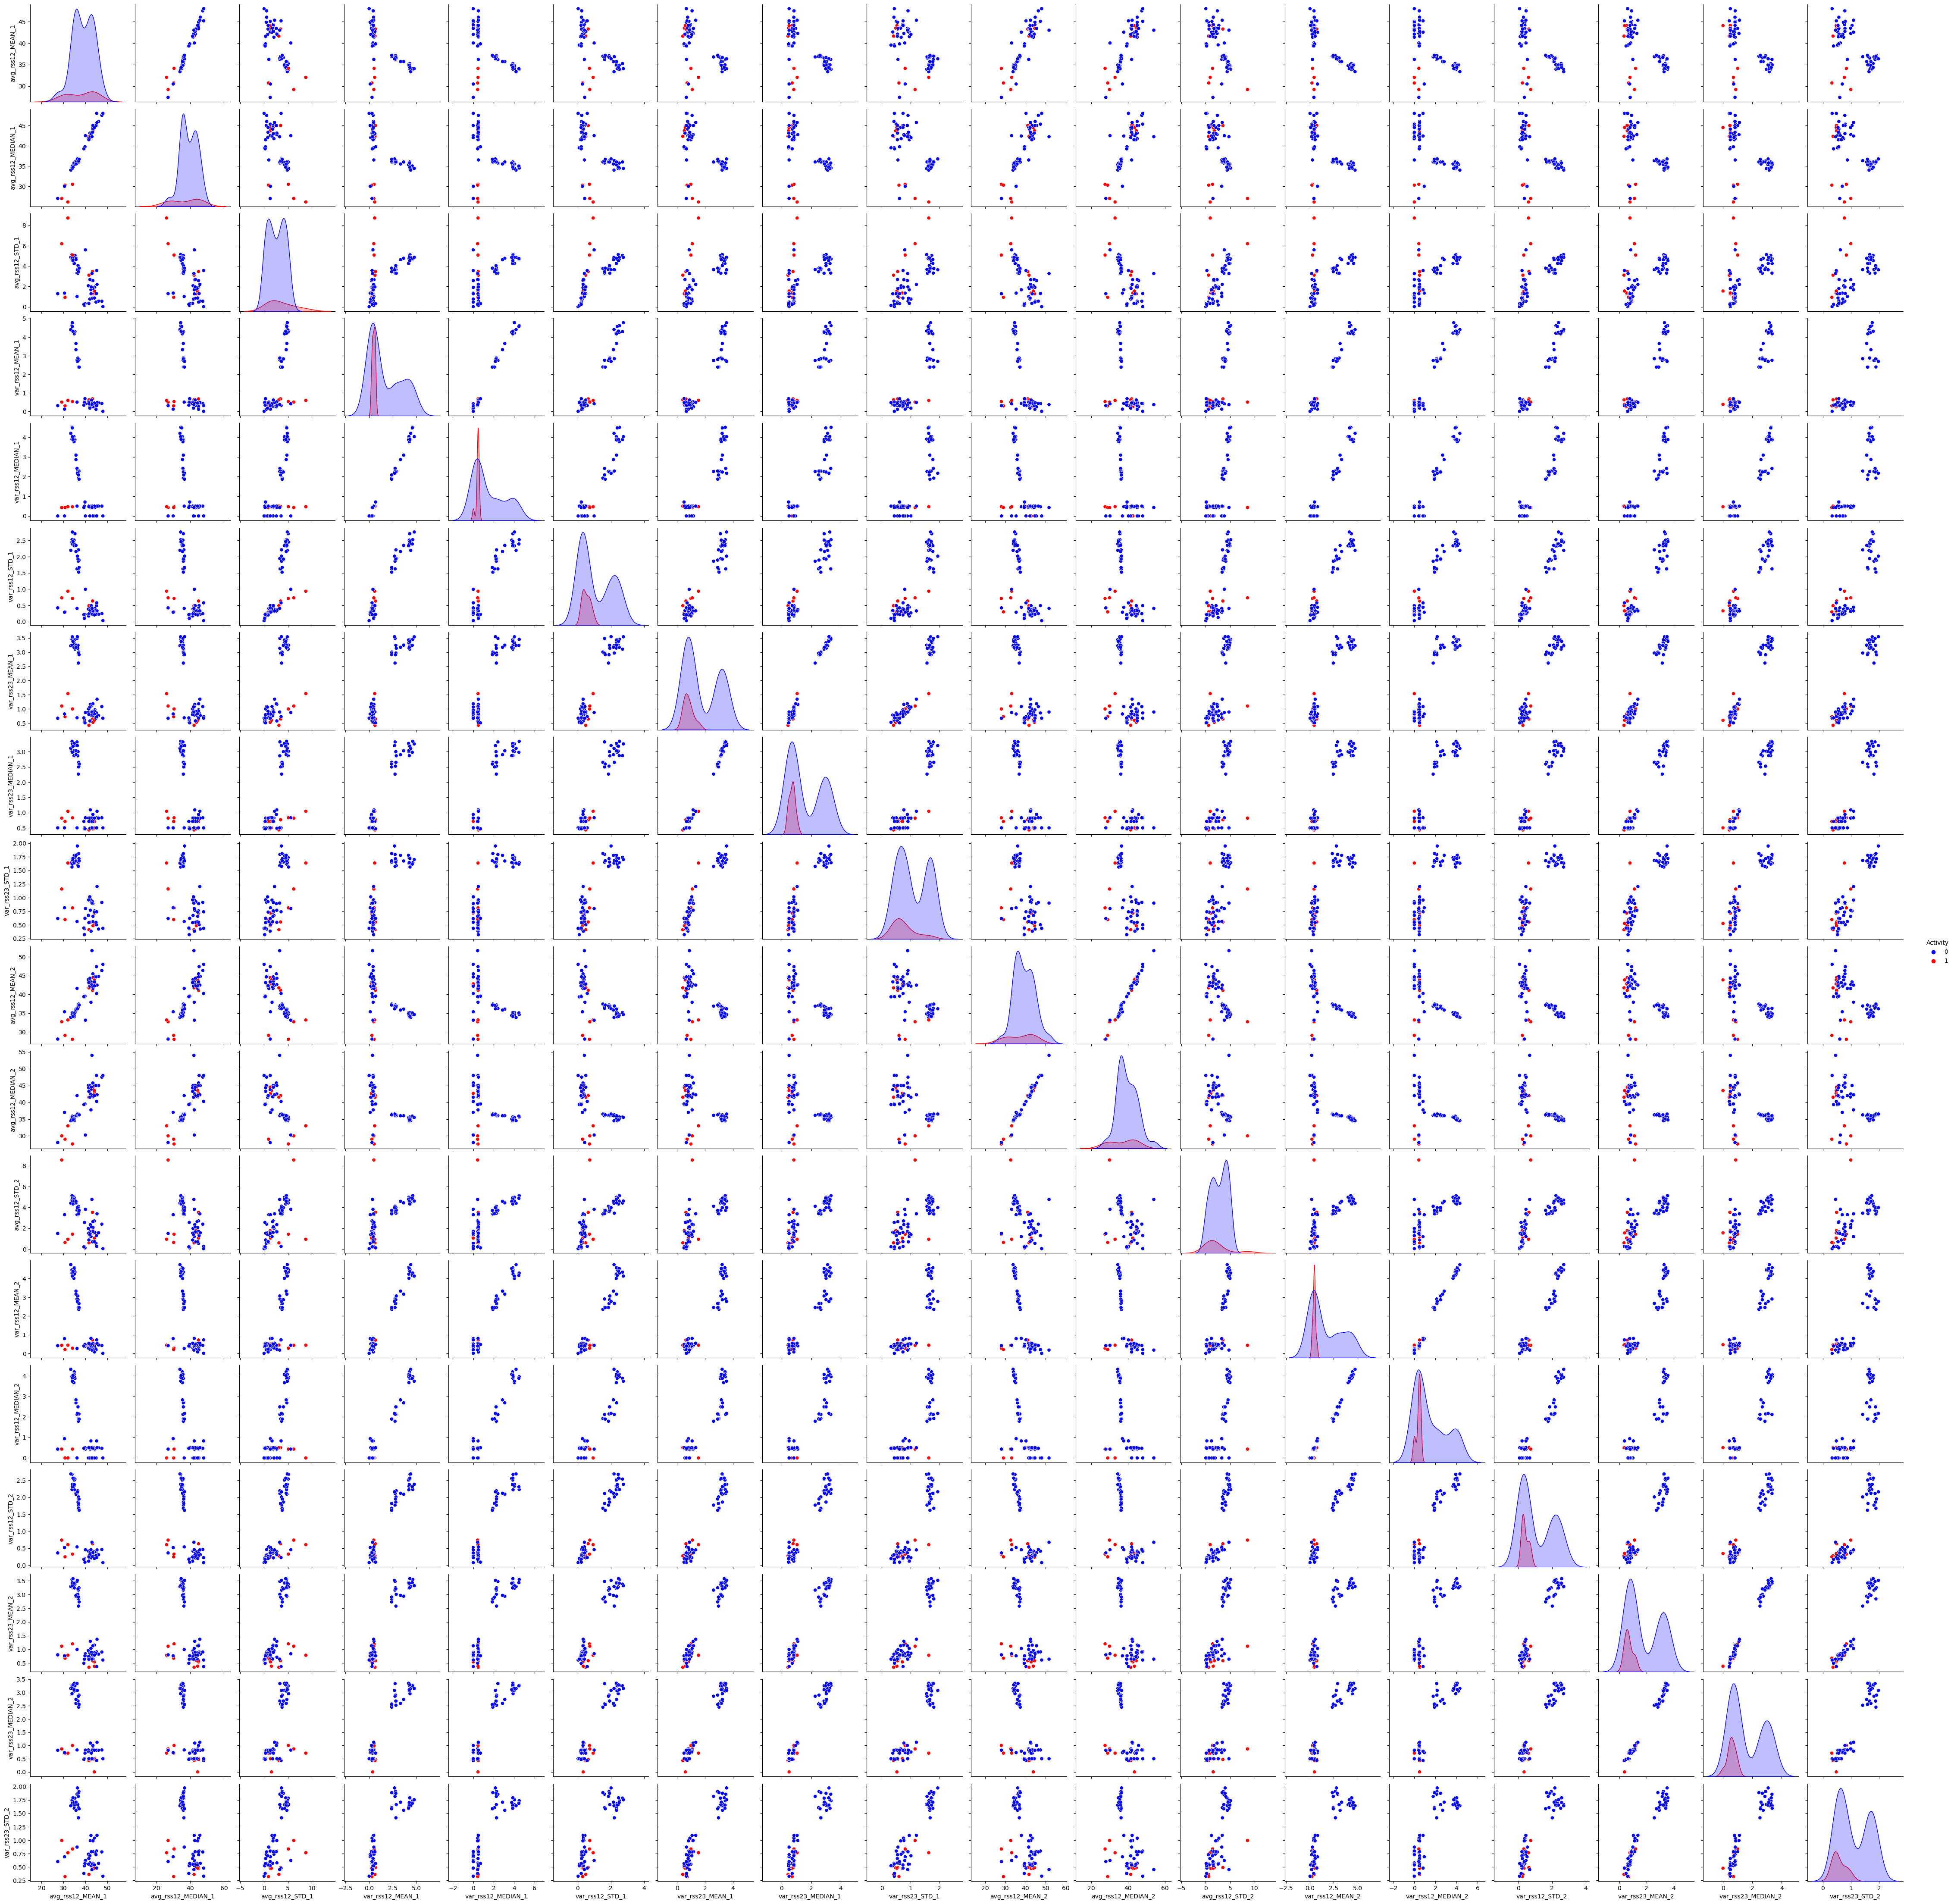

In [12]:
train_126_splitcol_df["Activity"] = train_126_splitcol_df["Activity"].astype("category")
sns.pairplot(train_126_splitcol_df, hue="Activity", diag_kind="kde", palette={'0': "blue", '1': "red"})
plt.show()

### Time Series Segments

In [13]:
def oversample(df):
    class_0 = df[df['Activity'] == 0].shape[0]
    class_1 = df[df['Activity'] == 1].shape[0]
    minority, majority = (1, 0) if class_0 > class_1 else (0, 1)

    minority_ds = df[df['Activity'] == minority]
    majority_ds = df[df['Activity'] == majority]

    minority_ds = resample(minority_ds, replace=True, random_state=60, n_samples=max(class_0, class_1))
    df = pd.concat([majority_ds, minority_ds])
    return df

In [14]:
def bestl_p(df, n, col_reqd, oversampling=False):
    performance_results = []

    for l in range(1, n+1):
        sub_df = split_data_get_features(df, l, col_reqd)
        sub_df['Activity'] = sub_df['Activity'].replace(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying','cycling'], ['1','0','1','0','0','0','0'])
        sub_df["Activity"] = sub_df["Activity"].astype(int)
        if oversampling == True:
            sub_df = oversample(sub_df)   
        X = sub_df.drop(columns=['Activity'], axis=1)
        y = sub_df['Activity']
        
    
        model = LogisticRegression(penalty = 'none', solver = 'lbfgs', max_iter = 100)
        rfecv = RFECV(estimator=model, cv=StratifiedKFold(5), scoring="accuracy")
        rfecv.fit(X, y)
    
        selected_features = np.sum(rfecv.support_)
        selected_feature_names = X.columns[rfecv.support_]
    
        performance_results.append({"l": l,"selected_features": selected_features,"Score": np.max(rfecv.cv_results_['mean_test_score']),"selected_feature_names" : selected_feature_names})
    
    performance_df = pd.DataFrame(performance_results)
    results_df = performance_df.drop('selected_feature_names', axis = 1)
    best_l_p_pair = performance_df.loc[performance_df['Score'].idxmax(), ['l', 'selected_features', 'selected_feature_names']]
    return results_df, best_l_p_pair['l'], best_l_p_pair['selected_features'], best_l_p_pair['selected_feature_names']

In [15]:
col_reqd = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
train_results, best_l, best_p, best_features = bestl_p(train_df_list, 20, col_reqd)
print(best_features)

Index(['avg_rss23_MIN_2', 'avg_rss23_Q1_2', 'avg_rss23_MEAN_3',
       'avg_rss23_MEDIAN_3', 'avg_rss23_MIN_3', 'avg_rss23_Q1_3',
       'avg_rss23_Q3_3', 'avg_rss23_MIN_5', 'avg_rss23_Q1_5',
       'avg_rss12_MAX_8', 'avg_rss12_MAX_9', 'avg_rss23_MIN_9',
       'avg_rss12_Q3_10', 'avg_rss12_MAX_11', 'avg_rss12_MAX_12',
       'avg_rss23_MIN_14', 'avg_rss23_MIN_15'],
      dtype='object')


In [16]:
train_results

,l,selected_features,Score
0,1,3,0.985714
1,2,3,0.942857
2,3,1,0.971429
3,4,35,0.971429
4,5,1,0.957143
5,6,3,0.957143
6,7,2,0.957143
7,8,5,0.957143
8,9,5,0.971429
9,10,8,0.957143


In [17]:
print(f"Best (l,p) pair is ({best_l},{best_p})\n")

Best (l,p) pair is (16,17)



<b>Right Way - </b><br>
The right way of doing the above scenario is to perform feature selection while doing the cross validation which will ensure generalization and give us better model. The wrong way would have been selecting the features and then performing the cross validation as it would have restricted the model to get/understand the patterns in the other columns/features.

<b>Observation -</b><br>
From the above results it can be observed that best (l,p) pair is (16,4) with an accuracy of 1.0 which is the highest among all the derives best cases.

### Confusion Matrix

In [18]:
lr1_df = split_data_get_features(train_df_list, best_l, col_reqd)
columns_to_keep = list(best_features)
columns_to_keep.append('Activity')
lr1_df = lr1_df[columns_to_keep]
lr1_df['Activity'] = lr1_df['Activity'].replace(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying','cycling'], ['1','0','1','0','0','0','0'])
lr1_df["Activity"] = lr1_df["Activity"].astype(int)
X = lr1_df.drop(columns=['Activity'], axis=1)
y = lr1_df['Activity']

In [19]:
#using statsmodels to give p-values of the selected features and the model summary
X_cons = sm.add_constant(X)  
y = y.astype(int)
logit_model = sm.Logit(y, X_cons)
result = logit_model.fit(method = 'bfgs')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
                           Logit Regression Results                           
Dep. Variable:               Activity   No. Observations:                   69
Model:                          Logit   Df Residuals:                       51
Method:                           MLE   Df Model:                           17
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                   1.000
Time:                        02:06:53   Log-Likelihood:            -1.6203e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.219e-05
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 

<b>Observation - </b><br>
From the above calculate summary of the Logistic Regression, on the basis of p-values, it is clearly visible that the classes are well seperated.

In [20]:
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Class: bending; AUC: {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='green', linestyle='dashed')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

Train accuracy =  1.0
CONFUSION MATRIX
[[60  0]
 [ 0  9]]


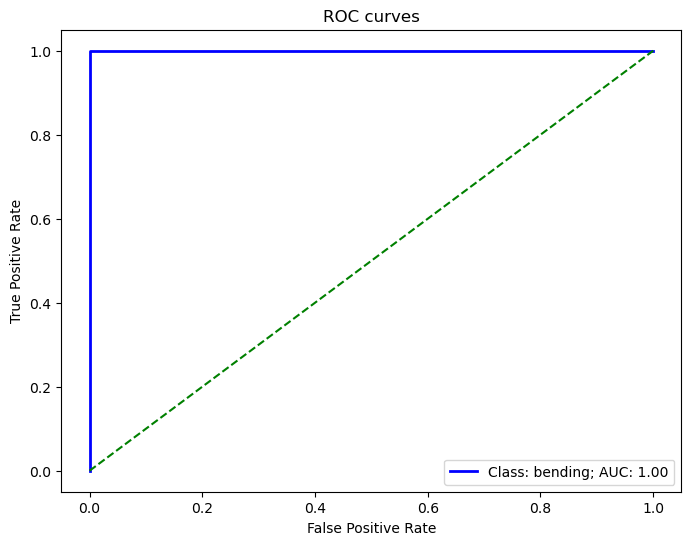

In [21]:
#using rfe model instead of stats for further predictions, conf_matrix and ROC
model_train = LogisticRegression(solver='liblinear')
rfe = RFE(model_train, n_features_to_select=best_p)
rfe.fit(X,y)
y_pred_prob = rfe.estimator_.predict_proba(X)[:, 1]
y_pred = rfe.predict(X)
model_CM = confusion_matrix(y, y_pred)
print('Train accuracy = ', accuracy_score(y, y_pred))
print("CONFUSION MATRIX")
print(model_CM)
roc_lr1 = plot_roc_curve(y, y_pred)

### Test Classifier

In [22]:
test_df = split_data_get_features(test_df_list, best_l, col_reqd)
test_df['Activity'] = test_df['Activity'].replace(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying','cycling'], ['1','0','1','0','0','0','0'])
test_df["Activity"] = test_df["Activity"].astype(int)

In [23]:
#test_df after only selected features
test_df = test_df[columns_to_keep]
X_test = test_df.drop(columns=['Activity'], axis=1)
y_test = test_df['Activity']

In [24]:
X_test_cons = sm.add_constant(X_test)  
y_test = y_test.astype(int)

Test accuracy =  1.0

CONFUSION MATRIX

[[15  0]
 [ 0  4]]


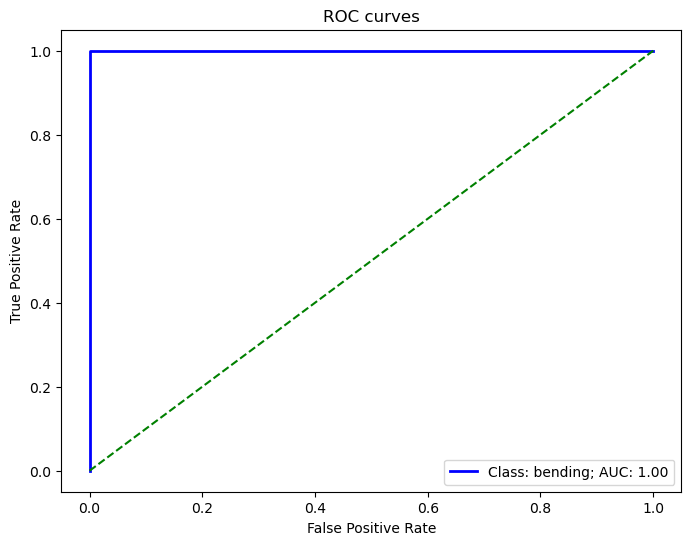

In [25]:
ytest_pred_prob = rfe.estimator_.predict_proba(X_test)[:, 1]
ytest_pred = rfe.predict(X_test)
model_CM_test = confusion_matrix(y_test, ytest_pred)
print('Test accuracy = ', accuracy_score(y_test, ytest_pred))
print("\nCONFUSION MATRIX\n")
print(model_CM_test)
roc_lr1_test = plot_roc_curve(y_test, ytest_pred)

<b>Observation - </b><br>
The training data accuracy with cross validation was 1.0 and the test data accuracy is 1.0, therefore there is no difference in the accuracies.

### Seperation

Yes the classes are well seperated that can be estimated from the model summary that is obtained above

### Curing the imbalance

In [26]:
lr1_df['Activity'].value_counts()

Activity
0    60
1     9
Name: count, dtype: int64

In [27]:
test_df['Activity'].value_counts()

Activity
0    15
1     4
Name: count, dtype: int64

<b>Observation - </b><br>
It is clearly visible that the training data just consists of 60 instances of class 0 (i.e. other activities) and only 9 instances of class 1 (i.e. bending). Thus we need to upsample the majority class in order to build a efficient classifier for fututre use. Also the confusion matrix shows that the classes are high imbalanced.

In [28]:
col_reqd = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
train_results_ups, best_l_ups, best_p_ups, best_features_ups = bestl_p(train_df_list, 20, col_reqd, oversampling=True)

In [29]:
train_results_ups

,l,selected_features,Score
0,1,6,1.000000
1,2,5,0.991667
2,3,2,1.000000
3,4,3,0.991667
4,5,3,0.991667
5,6,2,0.991667
6,7,2,0.991667
7,8,5,1.000000
8,9,5,1.000000
9,10,6,1.000000


In [30]:
print(f"After Upsampling best (l,p) pair is ({best_l_ups},{best_p_ups})")

After Upsampling best (l,p) pair is (1,6)


Train accuracy after Upsampling =  1.0
CONFUSION MATRIX
[[60  0]
 [ 0  9]]


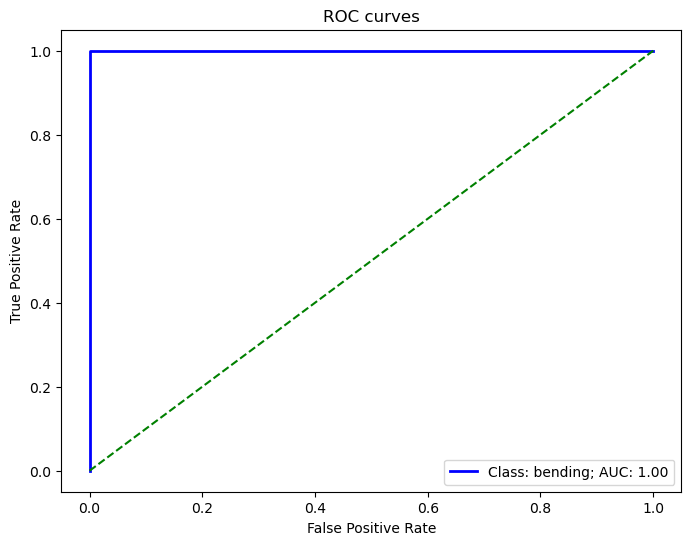

In [31]:
# Calculating upsampled training data accuracy and ROC AUC curve

lr2_df = split_data_get_features(train_df_list, best_l_ups, col_reqd)
columns_to_keep_ups = list(best_features_ups)
columns_to_keep_ups.append('Activity')
lr2_df = lr2_df[columns_to_keep_ups]
lr2_df['Activity'] = lr2_df['Activity'].replace(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying','cycling'], ['1','0','1','0','0','0','0'])
lr2_df["Activity"] = lr2_df["Activity"].astype(int)
X_ups = lr2_df.drop(columns=['Activity'], axis=1)
y_ups = lr2_df['Activity']
rfe.fit(X_ups,y_ups)
y_pred_prob_ups = rfe.estimator_.predict_proba(X_ups)[:, 1]
y_pred_ups = rfe.predict(X_ups)
model_CM_ups = confusion_matrix(y_ups, y_pred_ups)
print('Train accuracy after Upsampling = ', accuracy_score(y_ups, y_pred_ups))
print("CONFUSION MATRIX")
print(model_CM_ups)
roc_lr1 = plot_roc_curve(y_ups, y_pred_ups)

Test accuracy after Upsampling =  1.0
CONFUSION MATRIX
[[15  0]
 [ 0  4]]


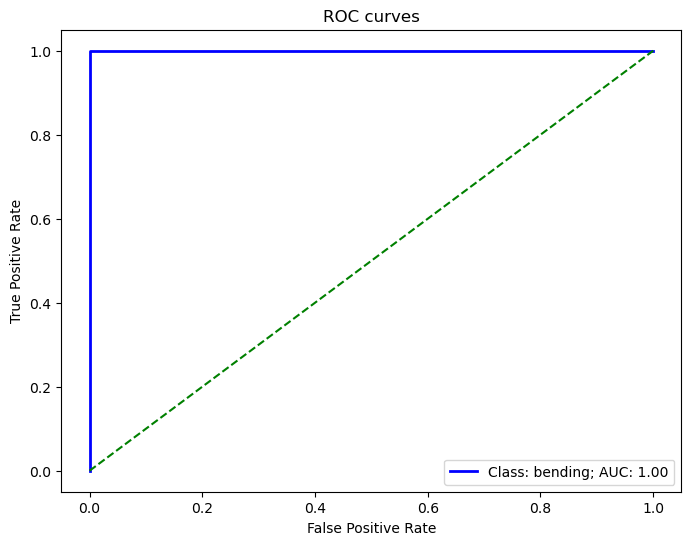

In [32]:
test_df_ups = split_data_get_features(test_df_list, best_l_ups, col_reqd)
test_df_ups['Activity'] = test_df_ups['Activity'].replace(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying','cycling'], ['1','0','1','0','0','0','0'])
test_df_ups["Activity"] = test_df_ups["Activity"].astype(int)
test_df_ups = test_df_ups[columns_to_keep_ups]
X_test_ups = test_df_ups.drop(columns=['Activity'], axis=1)
y_test_ups = test_df_ups['Activity']
ytest_pred_prob_ups = rfe.estimator_.predict_proba(X_test_ups)[:, 1]
ytest_pred_ups = rfe.predict(X_test_ups)
model_CM_test_ups = confusion_matrix(y_test_ups, ytest_pred_ups)
print('Test accuracy after Upsampling = ', accuracy_score(y_test_ups, ytest_pred_ups))
print("CONFUSION MATRIX")
print(model_CM_test_ups)
roc_lr1_test_ups = plot_roc_curve(y_test_ups, ytest_pred_ups)

### Binary Classification Using L1-penalized logistic regression

In [33]:
def bestl_p_L1(df, n, col_reqd):
    performance_results = []

    for l in range(1, n+1):
        sub_df = split_data_get_features(df, l, col_reqd)
        sub_df['Activity'] = sub_df['Activity'].replace(['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying', 'cycling'],[1, 0, 1, 0, 0, 0, 0])
        sub_df["Activity"] = sub_df["Activity"].astype(int)
        
        X = sub_df.drop(columns=['Activity'], axis=1)
        y = sub_df['Activity']

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        C_values = np.array([0.01,0.1,1,10,100])

        model = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, scoring="accuracy", max_iter=100, Cs=C_values)
        model.fit(X, y)

        best_C = model.C_[0]
        selected_features = np.sum(model.coef_ != 0)
        selected_feature_names = X.columns[model.coef_[0] != 0]

        performance_results.append({"l": l, "selected_features": selected_features, "Score": model.scores_[1].max(), "selected_feature_names": selected_feature_names})
    
    performance_df = pd.DataFrame(performance_results)
    results_df = performance_df.drop('selected_feature_names', axis=1)

    best_l_p_pair = performance_df.loc[performance_df['Score'].idxmax(), ['l', 'selected_features', 'selected_feature_names']]
    
    return results_df, best_l_p_pair['l'], best_l_p_pair['selected_features'], best_l_p_pair['selected_feature_names'], best_C


In [34]:
results_L1, best_l_L1, best_p_L1, best_features_L1, best_C = bestl_p_L1(train_df_list, 20, col_reqd)
display(results_L1)
print(f"Best Value for C : {best_C}")
print(f"Best Value for l : {best_l_L1}")
print(f"Selected Features : {list(best_features_L1)}")

,l,selected_features,Score
0,1,5,1.0
1,2,6,1.0
2,3,14,1.0
3,4,8,1.0
4,5,9,1.0
5,6,17,1.0
6,7,18,1.0
7,8,11,1.0
8,9,8,1.0
9,10,14,1.0


Best Value for C : 1.0
Best Value for l : 1
Selected Features : ['avg_rss12_Q3_1', 'var_rss12_MAX_1', 'avg_rss23_MIN_1', 'avg_rss23_MAX_1', 'avg_rss23_Q1_1']


### Comparision

From the above cell outputs is visible that L1-Logistice Regression had given an accuracy of 1.0 for all the cases of l, while that in Logistic Regression without any penalites it was in the range of 0.9 to 1.0, which shows that L1-Logsitic Regression perfroms better. Also it is easy to implement as the selection of features is handled in this without any external requirement like RFE which was required in the previous case.

### Multi-class Classification (The Realistic Case)

In [37]:
def bestl_p_L1_multinomial(df, n, col_reqd):
    performance_results = []
    classes = list(train_df['Activity'].unique())

    for l in range(1, n+1):
        sub_df = split_data_get_features(df, l, col_reqd)
        sub_df['Activity'] = sub_df['Activity'].replace(classes, range(len(classes)))
        sub_df["Activity"] = sub_df["Activity"].astype(int)
        X = sub_df.drop(columns=['Activity'], axis=1)
        y = sub_df['Activity']

        C_values = np.array([0.001,0.01,0.1,1,10])
        model = LogisticRegressionCV(penalty='l1', solver='saga', cv=StratifiedKFold(5), scoring="accuracy", Cs=C_values, multi_class="multinomial", max_iter=100)
        
        model.fit(X, y)

        best_C = model.C_[0]
        selected_features = np.sum(model.coef_ > 0.000000001, axis=1)
        selected_feature_names = [X.columns[i] for i in range(X.shape[1]) if np.any(model.coef_[:, i] > 0.000000001)]

        performance_results.append({"l": l, "selected_features": selected_features.sum(), "Score": model.scores_[y.unique()[0]].max(), "selected_feature_names": selected_feature_names})
    
    performance_df = pd.DataFrame(performance_results)
    results_df = performance_df.drop('selected_feature_names', axis=1)

    best_l_p_pair = performance_df.loc[performance_df['Score'].idxmax(), ['l', 'selected_features', 'selected_feature_names']]
    
    return results_df, best_l_p_pair['l'], best_l_p_pair['selected_features'], best_l_p_pair['selected_feature_names'], best_C

In [38]:
train_results_mul, best_l_mul, best_p_mul, best_features_mul, best_C_mul = bestl_p_L1_multinomial(train_df_list, 20, col_reqd)

In [39]:
print(f"Best l : {best_l_mul}\n")
display(train_results_mul)

Best l : 3



,l,selected_features,Score
0,1,115,0.928571
1,2,236,0.928571
2,3,347,1.000000
3,4,350,0.928571
4,5,580,1.000000
5,6,692,1.000000
6,7,823,0.928571
7,8,669,0.928571
8,9,1048,0.928571
9,10,840,0.928571


In [40]:
def plot_multiclass_roc(y_true, y_pred_prob, class_labels):
    y_bin = label_binarize(y_true, classes=range(len(class_labels)))
    n_classes = y_bin.shape[1]
    plt.figure(figsize=(8, 6))
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class: {class_labels[i]}; AUC: {roc_auc:.2f}')
    
    plt.plot([0, 1], [0, 1], color='green', linestyle='dashed')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC curves')
    plt.legend(loc="lower right")
    plt.show()

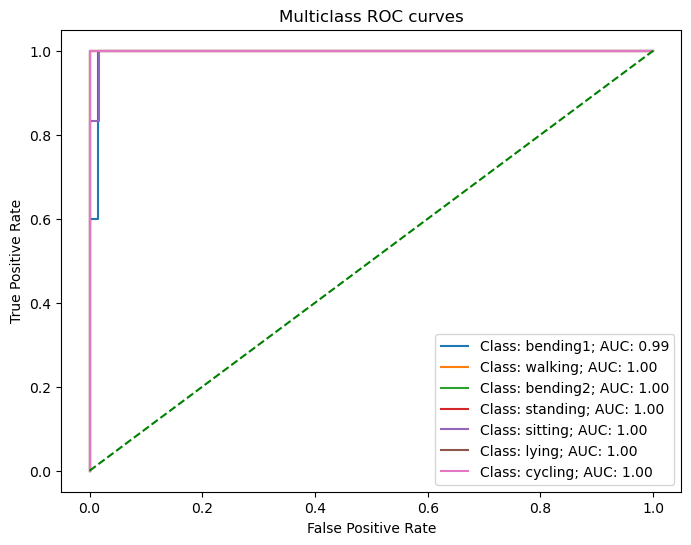

In [41]:
train_df_mul = split_data_get_features(train_df_list, best_l_mul, col_reqd)
columns_to_keep_mul = list(best_features_mul)
columns_to_keep_mul.append('Activity')
train_df_mul = train_df_mul[columns_to_keep_mul]
classes = list(train_df['Activity'].unique())

train_df_mul['Activity'] = train_df_mul['Activity'].replace(classes, range(len(classes)))
train_df_mul["Activity"] = train_df_mul["Activity"].astype(int)

X_mul_train = train_df_mul.drop(columns=['Activity'], axis=1)
y_mul_train = train_df_mul['Activity']


final_model = LogisticRegression(penalty='l1', solver='saga', C=best_C_mul, multi_class="multinomial", max_iter=100)
final_model.fit(X_mul_train, y_mul_train)

y_pred_mul = final_model.predict(X_mul_train)
y_pred_prob_mul = final_model.predict_proba(X_mul_train)

plot_multiclass_roc(y_mul_train, y_pred_prob_mul, classes)

Confusion Matrix

[[2 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [1 0 0 0 0 0 1]
 [0 0 0 2 0 1 0]
 [0 0 0 1 2 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]

Test accuracy =  0.7894736842105263


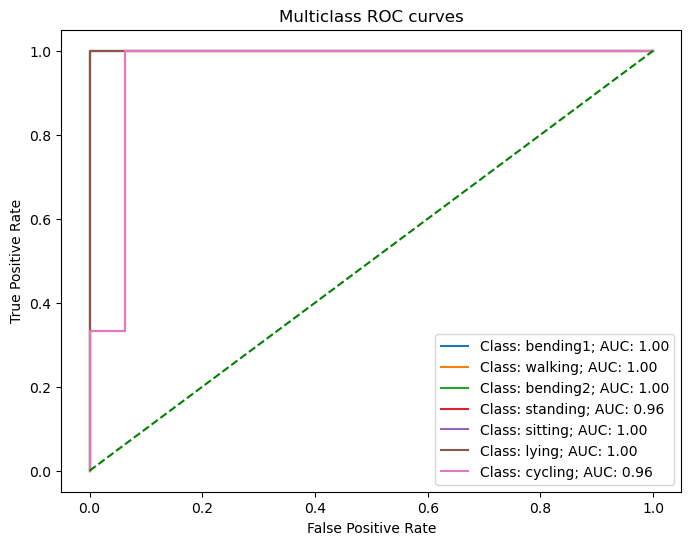

In [42]:
test_df_mul = split_data_get_features(test_df_list, best_l_mul, col_reqd)
test_df_mul = test_df_mul[columns_to_keep_mul]
classes = list(train_df['Activity'].unique())

test_df_mul['Activity'] = test_df_mul['Activity'].replace(classes, range(len(classes)))
test_df_mul['Activity'] = test_df_mul['Activity'].astype(int)

X_mul_test = test_df_mul.drop(columns=['Activity'], axis=1)
y_mul_test = test_df_mul['Activity']

y_pred_mul = final_model.predict(X_mul_test)
y_pred_prob_mul = final_model.predict_proba(X_mul_test)

model_CM_mul = confusion_matrix(y_mul_test, y_pred_mul)
print("Confusion Matrix\n")
print(model_CM_mul)
print('\nTest accuracy = ', accuracy_score(y_mul_test, y_pred_mul))

plot_multiclass_roc(y_mul_test, y_pred_prob_mul, classes)

### Naive Bayes

#### Gaussian Naive Bayes

In [43]:
def best_l_gaussian(df, n, col_reqd):
    performance_results = []

    for l in range(1, n + 1):
        sub_df = split_data_get_features(df, l, col_reqd)
        sub_df['Activity'] = sub_df['Activity'].replace(classes, range(len(classes)))
        sub_df["Activity"] = sub_df["Activity"].astype(int)
        X = sub_df.drop(columns=['Activity'], axis=1)
        y = sub_df['Activity']
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        gnb = GaussianNB()
        gnb_cv = cross_val_score(gnb, X, y, cv=StratifiedKFold(5), scoring="accuracy")

        performance_results.append({"l": l, "Accuracy": np.max(gnb_cv)})

    performance_df = pd.DataFrame(performance_results)
    best_l = performance_df.loc[performance_df["Accuracy"].idxmax(), "l"]
    return performance_df, best_l

In [44]:
train_results_gau, best_l_gau = best_l_gaussian(train_df_list, 20, col_reqd)

In [45]:
print(f"Best l for Gaussian Naive Bayes : {best_l_gau}")
display(train_results_gau)

Best l for Gaussian Naive Bayes : 1


,l,Accuracy
0,1,0.928571
1,2,0.923077
2,3,0.785714
3,4,0.785714
4,5,0.785714
5,6,0.714286
6,7,0.857143
7,8,0.857143
8,9,0.714286
9,10,0.714286


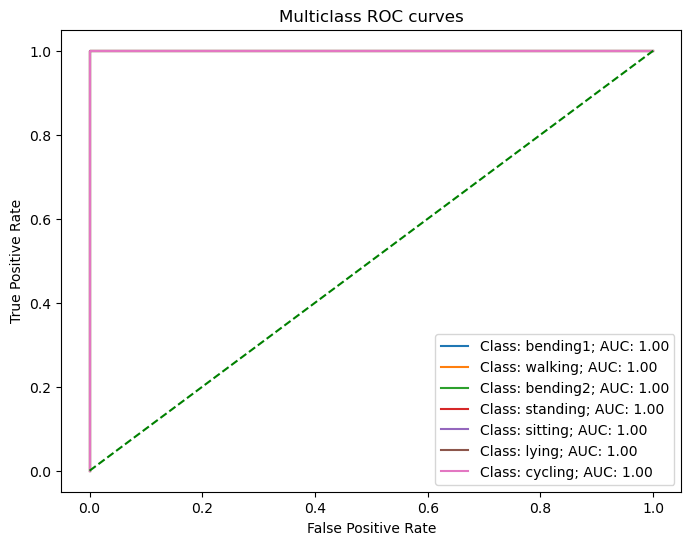

In [46]:
train_df_gau = split_data_get_features(train_df_list, best_l_gau, col_reqd)
train_df_gau['Activity'] = train_df_gau['Activity'].replace(classes, range(len(classes)))
train_df_gau["Activity"] = train_df_gau["Activity"].astype(int)
X_gau_train = train_df_gau.drop(columns=['Activity'], axis=1)
y_gau_train = train_df_gau['Activity']
gnb = GaussianNB()
gnb.fit(X_gau_train, y_gau_train)
y_pred_gau = gnb.predict(X_gau_train)
y_pred_prob_gau = gnb.predict_proba(X_gau_train)
plot_multiclass_roc(y_gau_train, y_pred_prob_gau, classes)


Test accuracy =  0.8947368421052632


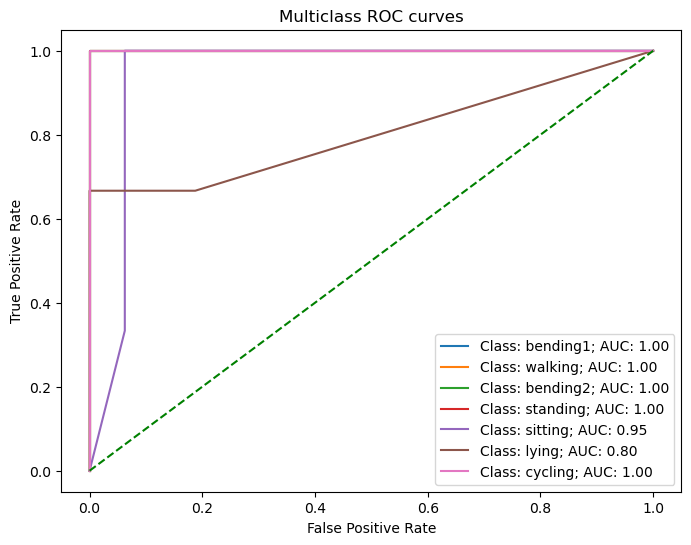

In [47]:
test_df_gau = split_data_get_features(test_df_list, best_l_gau, col_reqd)
test_df_gau['Activity'] = test_df_gau['Activity'].replace(classes, range(len(classes)))
test_df_gau["Activity"] = test_df_gau["Activity"].astype(int)
X_gau_test = test_df_gau.drop(columns=['Activity'], axis=1)
y_gau_test = test_df_gau['Activity']
y_pred_gau = gnb.predict(X_gau_test)
y_pred_prob_gau = gnb.predict_proba(X_gau_test)
print('\nTest accuracy = ', accuracy_score(y_gau_test, y_pred_gau))
plot_multiclass_roc(y_gau_test, y_pred_prob_gau, classes)

#### Multinomial Naive Bayes

In [48]:
def best_l_multinomial(df, n, col_reqd):
    performance_results = []

    for l in range(1, n + 1):
        sub_df = split_data_get_features(df, l, col_reqd)
        sub_df['Activity'] = sub_df['Activity'].replace(classes, range(len(classes)))
        sub_df["Activity"] = sub_df["Activity"].astype(int)
        X = sub_df.drop(columns=['Activity'], axis=1)
        y = sub_df['Activity']
        normalizer = MinMaxScaler()
        X = normalizer.fit_transform(X)
        mnb = MultinomialNB()
        mnb_cv = cross_val_score(mnb, X, y, cv=StratifiedKFold(5), scoring="accuracy")

        performance_results.append({"l": l, "Accuracy": np.max(mnb_cv)})

    performance_df = pd.DataFrame(performance_results)
    best_l = performance_df.loc[performance_df["Accuracy"].idxmax(), "l"]
    return performance_df, best_l

In [49]:
train_results_mnb, best_l_mnb = best_l_multinomial(train_df_list, 20, col_reqd)

In [50]:
print(f"Best l for Multinomial Naive Bayes : {best_l_mnb}")
display(train_results_mnb)

Best l for Multinomial Naive Bayes : 5


,l,Accuracy
0,1,0.785714
1,2,0.785714
2,3,0.714286
3,4,0.785714
4,5,0.857143
5,6,0.857143
6,7,0.857143
7,8,0.857143
8,9,0.857143
9,10,0.785714


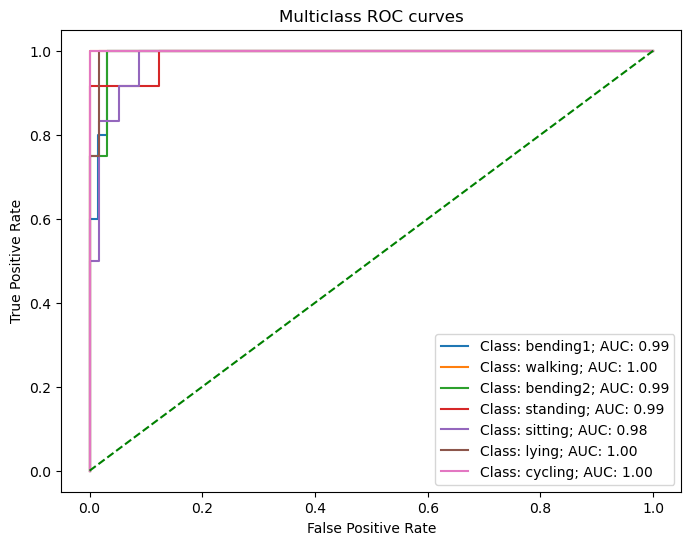

In [51]:
train_df_mnb = split_data_get_features(train_df_list, best_l_mnb, col_reqd)
train_df_mnb['Activity'] = train_df_mnb['Activity'].replace(classes, range(len(classes)))
train_df_mnb["Activity"] = train_df_mnb["Activity"].astype(int)
X_mnb_train = train_df_mnb.drop(columns=['Activity'], axis=1)
y_mnb_train = train_df_mnb['Activity']
mnb = MultinomialNB()
mnb.fit(X_mnb_train, y_mnb_train)
y_pred_mnb = mnb.predict(X_mnb_train)
y_pred_prob_mnb = mnb.predict_proba(X_mnb_train)
plot_multiclass_roc(y_mnb_train, y_pred_prob_mnb, classes)


Test accuracy =  0.7368421052631579


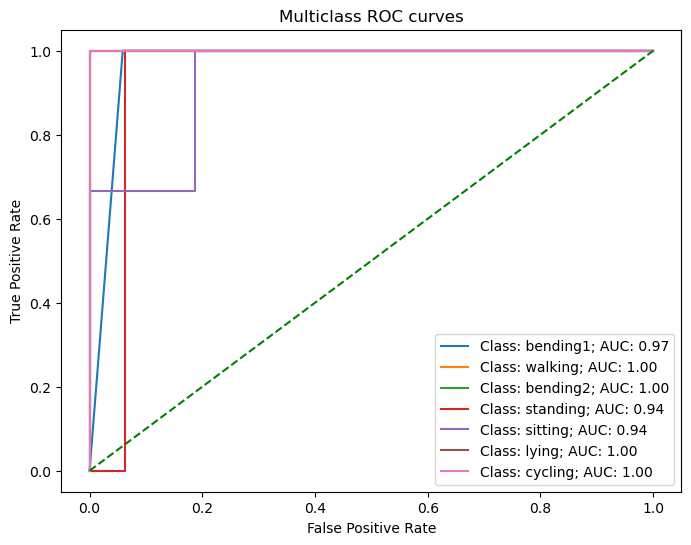

In [52]:
test_df_mnb = split_data_get_features(test_df_list, best_l_mnb, col_reqd)
test_df_mnb['Activity'] = test_df_mnb['Activity'].replace(classes, range(len(classes)))
test_df_mnb["Activity"] = test_df_mnb["Activity"].astype(int)
X_mnb_test = test_df_mnb.drop(columns=['Activity'], axis=1)
y_mnb_test = test_df_mnb['Activity']
y_pred_mnb = mnb.predict(X_mnb_test)
y_pred_prob_mnb = mnb.predict_proba(X_mnb_test)
print('\nTest accuracy = ', accuracy_score(y_mnb_test, y_pred_mnb))
plot_multiclass_roc(y_mnb_test, y_pred_prob_mnb, classes)

### Comparision

As per the above result from Multinomial Classification using Naive Bayes - Gaussian and Multinomial, Multi-class Classification using L1-Regularization, the best results on the basis of ROC curve and accuracy was for <b>Gaussian Naive Bayes</b> i.e. 0.89. The implementation was simple for all the cases but results generated were the best for Gaussian Naive Bayes.